In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import math

from pandas import DataFrame, Series
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [2]:
def normalization(columns): # -1~1사이의 값으로 정규화
    MinMax = (columns - columns.min(axis=0)) / (columns.max(axis=0) - columns.min(axis=0))
    MinMax = (MinMax * 2) - 1
    MinMax
    return MinMax

In [3]:
def print_graph(MinMax, num): # num is cut range
    length = len(MinMax)
    plt.figure(figsize=(20, 5)) # graph size
    plt.xticks(np.arange(0, length+1, num))
    plt.plot(MinMax)
    plt.show()

In [4]:
def cut_count(MinMax, num, cnt): # 왼발, 오른발의 데이터를 잘라서 구분
    count = int((len(MinMax)-num) / cnt)
    step = []
    temp = 0
    for i in range(0, count):
        temp = num+i*cnt
        step.append(MinMax[temp:temp+cnt])
    return step

In [5]:
def ACF(step, cnt): #자기상관계수 구하는 함수 cnt = 한발에 들어가는 데이터의 수
    answer = 0
    acf = []
    for i in step:
        answer = 0
#         answer = np.linalg.norm(i)
        for j in i:
#             print(j)
            answer = answer + j*j
        answer = answer / cnt
#         print(answer)
        acf.append(answer)
    return acf

In [6]:
def compare_acf(acf): # 자기상관계수 값을 구해줌
    num = len(acf) / 2
    left = []
    right = []
    result = []
    avg = 0
    if (len(acf) == 2 or len(acf) == 3) :
        if (acf[0] > acf[1]):
            result = [[1.0, acf[1]/acf[0]],
                     [acf[1]/acf[0], 1.0]]
            return result
        else :
            result = [[1.0, acf[0]/acf[1]],
                     [acf[0]/acf[1], 1.0]]
            return result
    elif (len(acf) == 4 or len(acf) == 5) : 
        for i in range(1, 3):
            if (acf[i-1] > acf[i]):
                avg += acf[i]/acf[i-1]
                         
            else :
                avg += acf[i-1]/acf[i]
        result = [[1.0, avg / 2],
                  [avg/2, 1.0]]
        return result 
    elif (len(acf) % 2 == 0) :
#         print(len(acf))
        for i in range(1, len(acf), +2):
            left.append(acf[i])
            right.append(acf[i-1])
#             print(acf[i], acf[i-1])
        result = np.corrcoef(left, right)
        result = abs(result)
#         print("even", result)
    else :
        for i in range(1, len(acf)-1, +2):
            left.append(acf[i])
            right.append(acf[i-1])
#             print(acf[i], acf[i-1])
        result = np.corrcoef(left, right)
        result = abs(result)
#         print ("odd", result)
    return result

In [7]:
def seperate_z(x) :
    if (x < 0.6):
        return False
    else : return True

In [8]:
def LPF(rawData):
    rawData['targetData'] = rawData['AccY']

    ts = 0.01 # 100Hz
    tau = 0.1
#     print_graph(rawData['targetData'], 50)
#     print(rawData['targetData'])
    tmpResult = Series(np.zeros(len(rawData.targetData)))
    tmpResult[0] = rawData.targetData[0]

    for i in np.arange(1, len(rawData.targetData)):
        tmpResult[i] = (tau*tmpResult[i-1] + ts * rawData.targetData[i]) / (ts + tau)

    rawData['LPF'] = tmpResult

#     plt.plot(rawData.SampleRate, rawData.targetData, '#afafaf',  rawData.SampleRate, rawData.LPF_X, 'b')
#     plt.grid(True)
#     plt.show()
#     print(rawData)
    return rawData

In [9]:
def main(rawData, cnt):
    LPFData = LPF(rawData)
#     print(LPFData)
    MinMax = normalization(LPFData['LPF'])
#     print_graph(MinMax, 80)
    step = cut_count(MinMax, 0, cnt)
    acf = ACF(step, cnt)
    compare = compare_acf(acf)
    #     print(compare)
    result = True
    if (compare[0][1] > 0.6):
        result=  True
    else : result = False
#     if (result == True):
#         print('\033[34m', result, '\033[0m', compare[0][1])
#     else : print('\033[31m', result, '\033[0m', compare[0][1])
    return result

In [79]:
# rawData = pd.read_csv('KimGayoung/normalWalk1.csv')
# print_graph(rawData, 174)
f = open("result.csv", "w", encoding='utf-8', newline='')
wr = csv.writer(f)
for i in range(1, 201):
    cnt = 0
    for j in range(0, 5):
        rawData = pd.read_csv(f'abnormal/abnormalWalk{j}.csv')
        result = main(rawData, i)
        if (result == True):
            cnt += 1
    wr.writerow([i,cnt*20])
    print(i, " : ", cnt*20, "%")
f.close()

 True  0.9873011455674237
 True  0.9941275011784696
 True  0.9888147589815589
 True  0.9853678319828354
 True  0.9901149853793227
1  :  100 %
 True  0.9499562723499226
 True  0.9770612142221462
 True  0.9539639997196327
 True  0.942053785016386
 True  0.9630593361443825
2  :  100 %
 True  0.9212254340537481
 True  0.9545865219348779
 True  0.9343366013592438
 True  0.8792966859603397
 True  0.940943926973837
3  :  100 %
 True  0.8849598775088316
 True  0.9091824417026131
 True  0.8738773858644187
 True  0.8454734260585488
 True  0.8742440306067416
4  :  100 %
 True  0.8757740785915448
 True  0.8718563887428998
 True  0.8767661362603678
 True  0.7492140342120988
 True  0.7868362703867462
5  :  100 %
 True  0.7374324820233917
 True  0.8008912836824611
 True  0.7688970949543166
 True  0.7833035169192967
 True  0.8142321223122205
6  :  100 %
 True  0.7058884432175339
 True  0.8155193019858702
 True  0.8220274912415698
 True  0.7068619876973395
 True  0.8482511583505125
7  :  100 %
 False  

 False  0.01072118209303307
 True  0.6370931352724541
 False  0.06278239080841536
 False  0.2019226868468557
 False  0.02838866364583568
44  :  20 %
 False  0.10678472457164422
 True  0.6018363320501149
 False  0.3696878204263242
 False  0.0010988374692677523
 False  0.0063025110839184
45  :  20 %
 False  0.13571123749728414
 False  0.5662753344376059
 False  0.49724874346826037
 False  0.02134814291954608
 False  0.04068240751407809
46  :  0 %
 False  0.17334270495451612
 True  0.6126915397074836
 False  0.37829420522157003
 False  0.3028304853731072
 False  0.04091955049205559
47  :  20 %
 False  0.21949591641829094
 True  0.6735263011014893
 False  0.2975636529545144
 False  0.22733911101754503
 False  0.09817430476885732
48  :  20 %
 False  0.006399703932623042
 False  0.5967051106292635
 False  0.3459566113035179
 False  0.3435293133920608
 False  0.029407288590328224
49  :  0 %
 False  0.16892290655437323
 False  0.5610041442409517
 False  0.2860038464746682
 False  0.57653959977

86  :  40 %
 True  0.7582129308674613
 False  0.5460384713490232
 False  0.4181117817524271
 False  0.5629346885024323
 True  0.6626930650962883
87  :  40 %
 True  0.7511924543664137
 False  0.5773469375316077
 False  0.4185729350525699
 False  0.5587819151034599
 True  0.6801238886488565
88  :  40 %
 True  0.7150821757073119
 False  0.5650714015660441
 False  0.5938232826928148
 False  0.5598010182239346
 True  0.6694100138452251
89  :  40 %
 True  0.6645860695123428
 False  0.4763897118251735
 True  0.8427073277642092
 False  0.44937049507687493
 True  0.679717672427558
90  :  60 %
 False  0.5272158784849598
 False  0.2796931854093375
 True  0.9637060532669774
 False  0.28739787080197504
 True  0.683376011296741
91  :  40 %
 False  0.5564365215157744
 False  0.07989741925150182
 True  0.9789906674914329
 False  0.1742577308189397
 True  0.6884556107679616
92  :  40 %
 True  0.7782407355523316
 True  0.8145251923353186
 True  0.9848788265369449
 False  0.02635280083477018
 True  0.735

 False  0.4344857480676836
 True  0.8606073688052668
 True  0.9554693569593813
 True  0.9773877737193251
 False  0.561635654534564
131  :  60 %
 False  0.44617111642058993
 True  0.8962645250225992
 True  0.9536443684066265
 True  0.9759217158970699
 False  0.08662236877578938
132  :  60 %
 False  0.4458432585756657
 True  0.90984632600748
 True  0.9840684518158069
 True  0.9731574864141888
 False  0.5557560338624601
133  :  60 %
 False  0.22188397989725092
 True  0.8176736628281168
 True  0.7315823325493259
 False  0.41741513945965125
 False  0.5067110534903678
134  :  40 %
 False  0.24600201025659418
 True  0.8206894165046517
 True  0.7885988511148943
 False  0.42754398046502684
 False  0.5062654440609267
135  :  40 %
 False  0.2761193728840856
 True  0.8256162350300348
 True  0.7442138394900477
 False  0.4481574976873929
 False  0.5043387540006856
136  :  40 %
 False  0.3111863541034827
 True  0.8292366840046321
 True  0.7087965465837491
 False  0.475895158858376
 False  0.500086625

 True  0.8180640948166296
 True  0.6311034619889089
 True  0.7528243326501588
175  :  100 %
 True  0.931990833585032
 True  0.832329244168763
 True  0.8208183184960253
 True  0.6320554288973548
 True  0.7443753511158127
176  :  100 %
 True  0.9373330668845983
 True  0.8421394460531031
 True  0.8313629994180813
 True  0.6333176016523777
 True  0.7399998168847701
177  :  100 %
 True  0.940727595160116
 True  0.8383199219045364
 True  0.8465869102846447
 True  0.6347344969650938
 True  0.7385797746669118
178  :  100 %
 True  0.9415769052928411
 True  0.8359968539525839
 True  0.8635986506274127
 True  0.6360022937065775
 True  0.7385458494193176
179  :  100 %
 True  0.9505184977754804
 True  0.8349090541322457
 True  0.8805517627417966
 True  0.6369537891977399
 True  0.7379820106427069
180  :  100 %
 True  0.9693044535487326
 True  0.8350683716380971
 True  0.8974788243439442
 True  0.6376324925929593
 True  0.7366890996668336
181  :  100 %
 True  0.9853731167161435
 True  0.836697035144

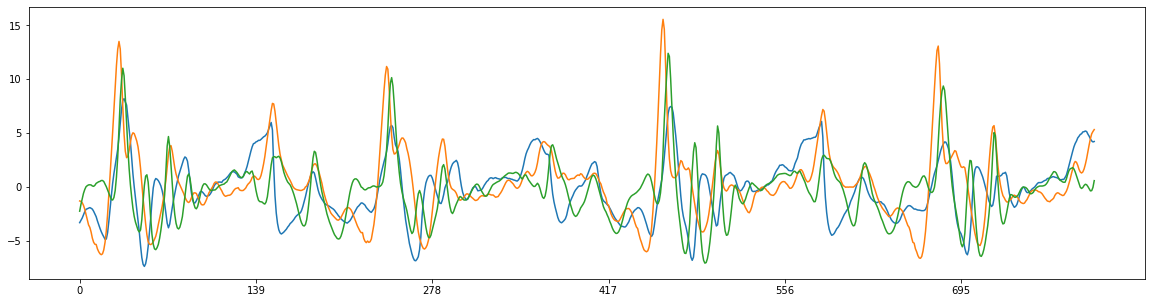

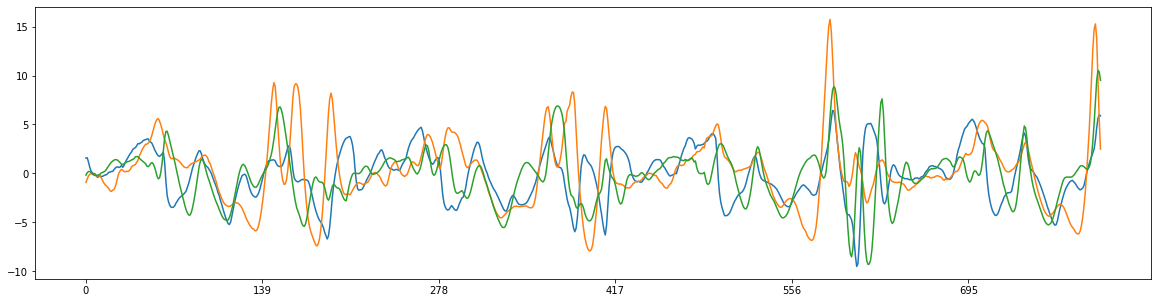

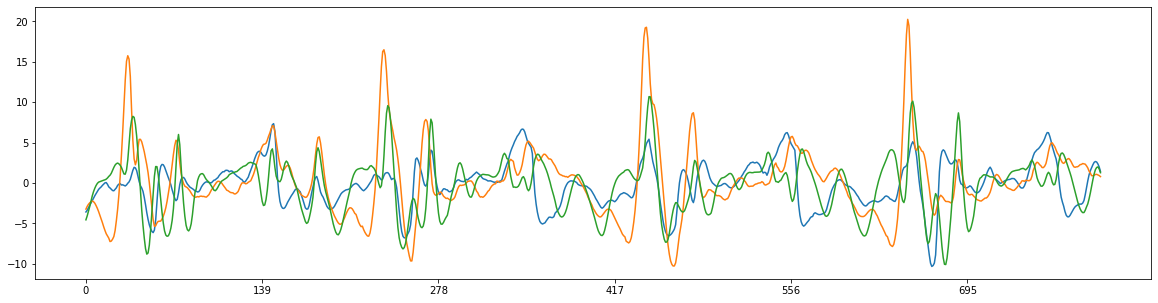

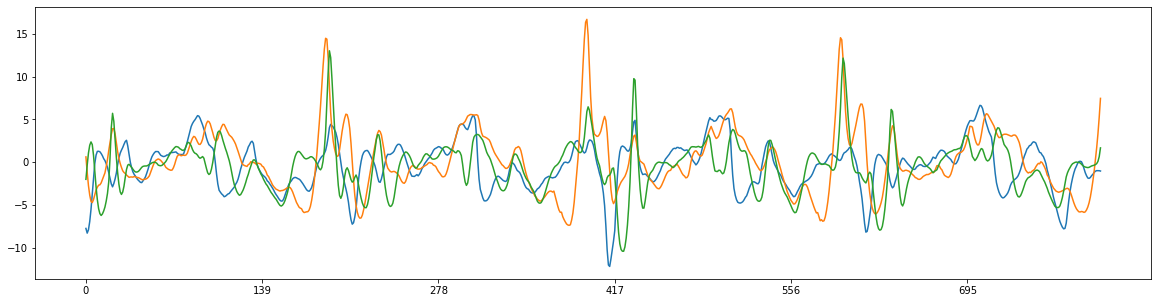

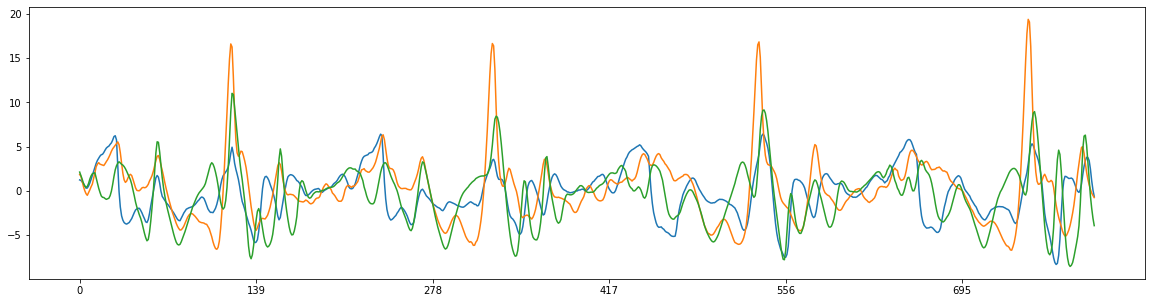

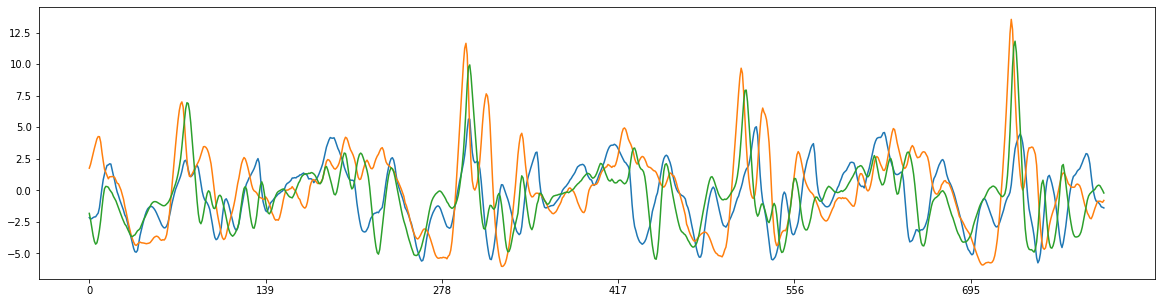

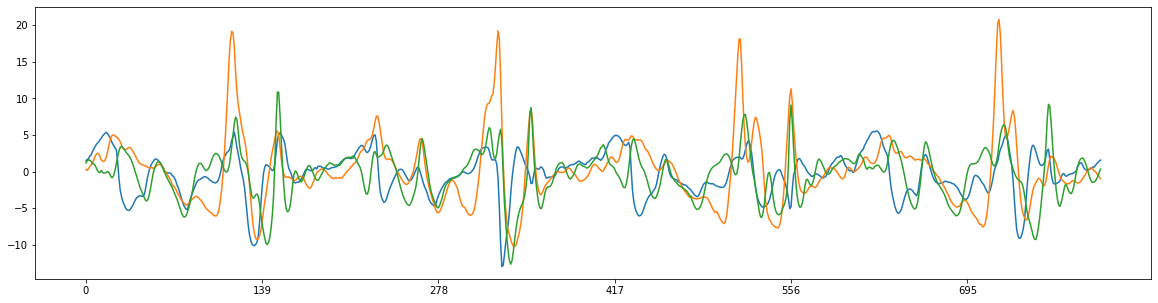

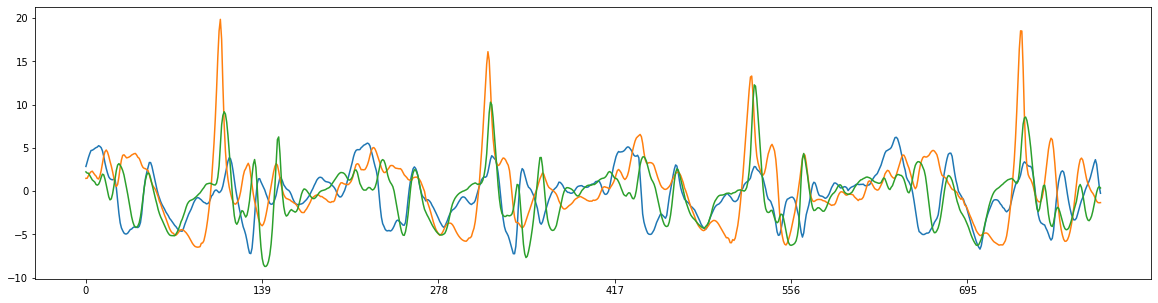

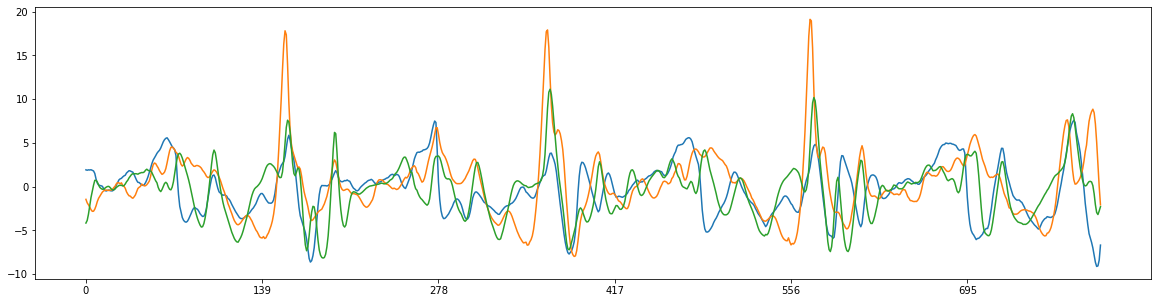

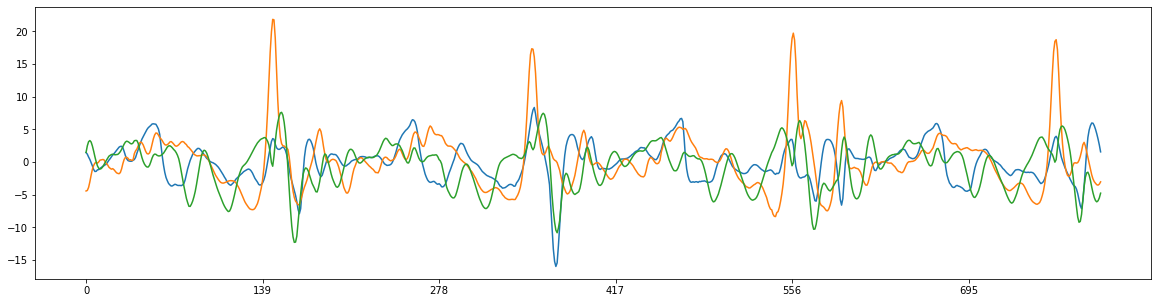

50 %


In [19]:
cnt = 0
for j in range(0, 10):
    rawData = pd.read_csv(f'KimGunho/normalWalk{j}.csv')
    print_graph(rawData[['AccX', 'AccY', 'AccZ']], 139)
    result = main(rawData, 139)
    if (result == True):
        cnt += 1
print(cnt*10, "%")

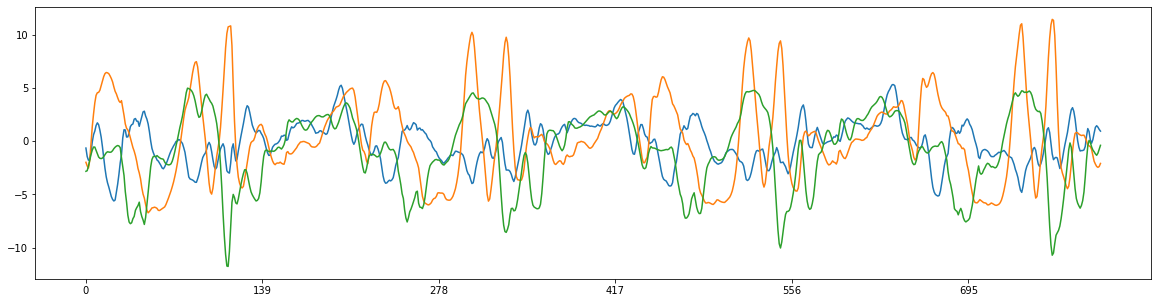

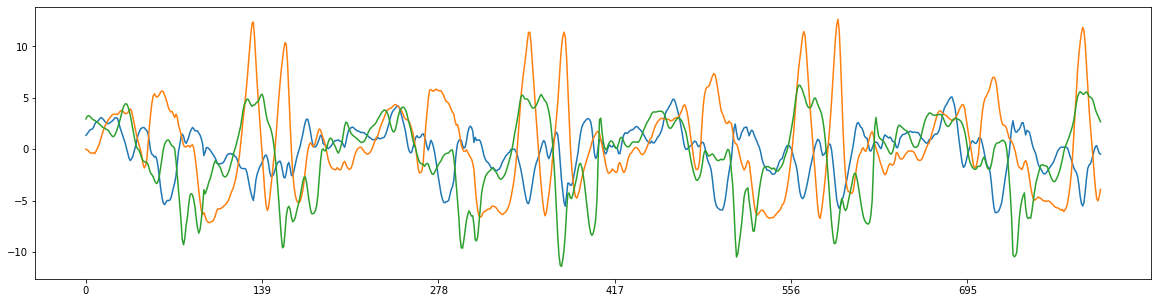

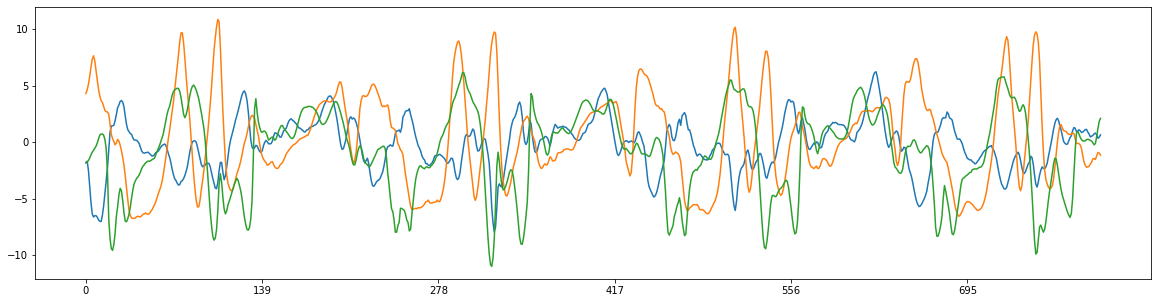

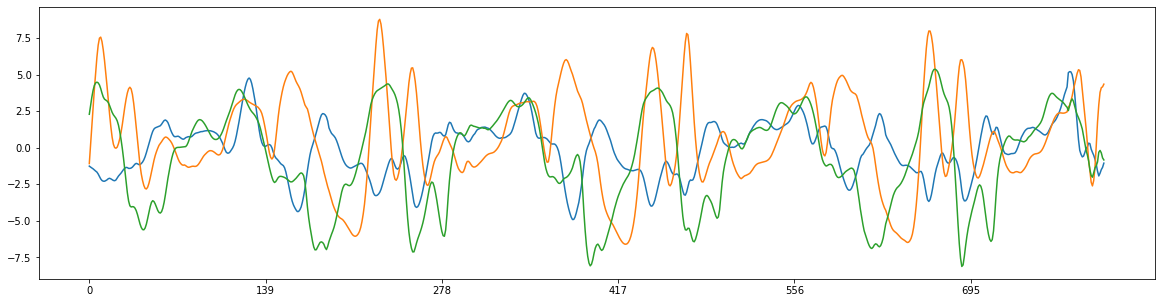

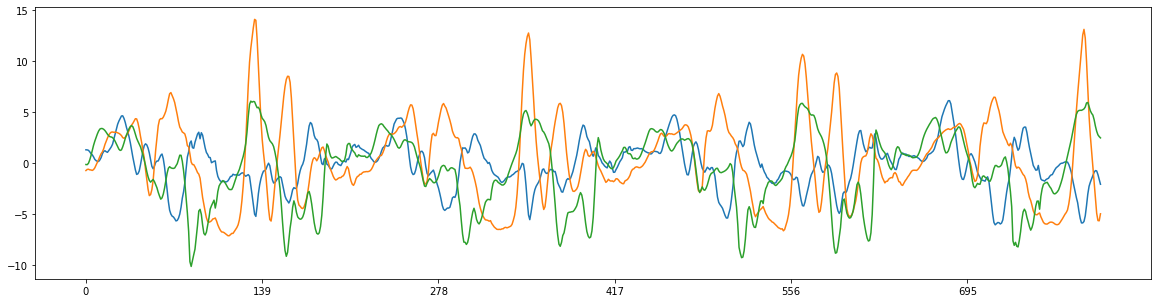

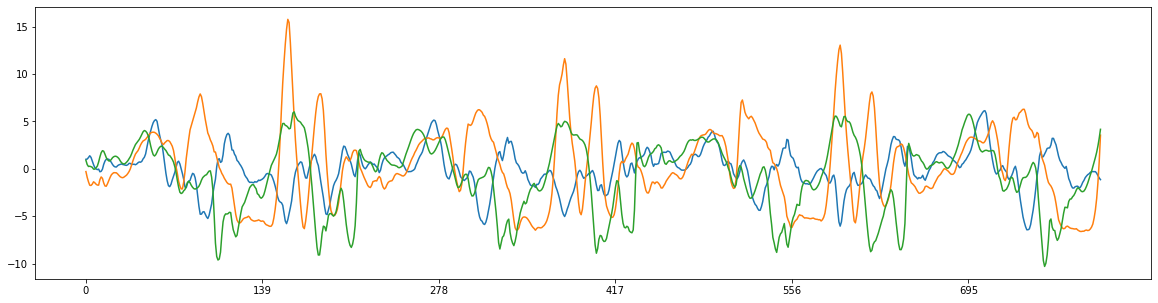

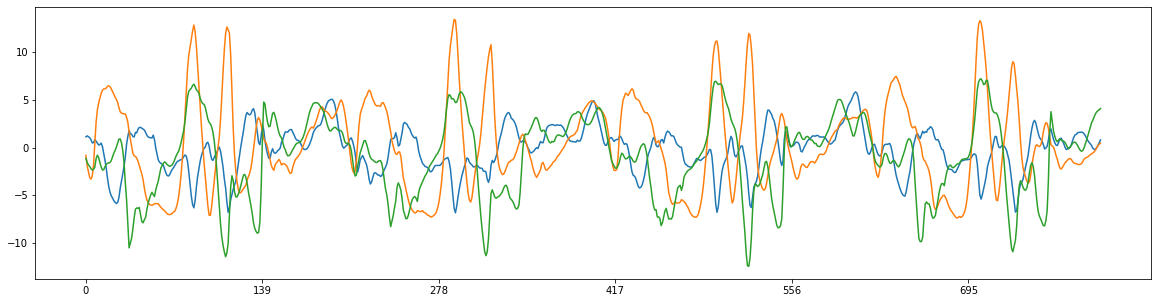

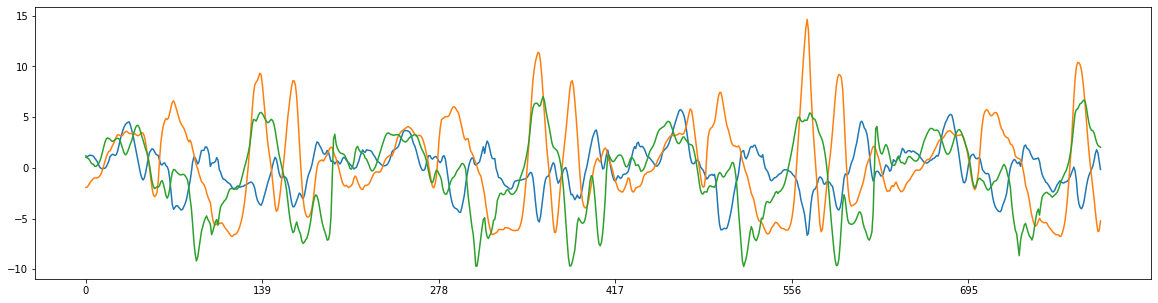

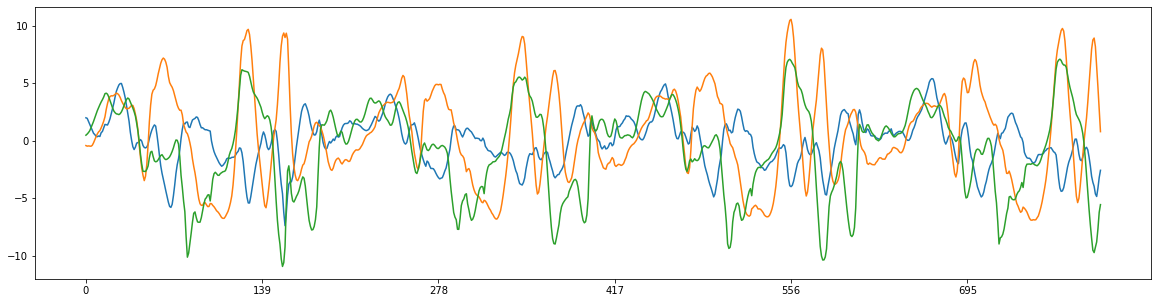

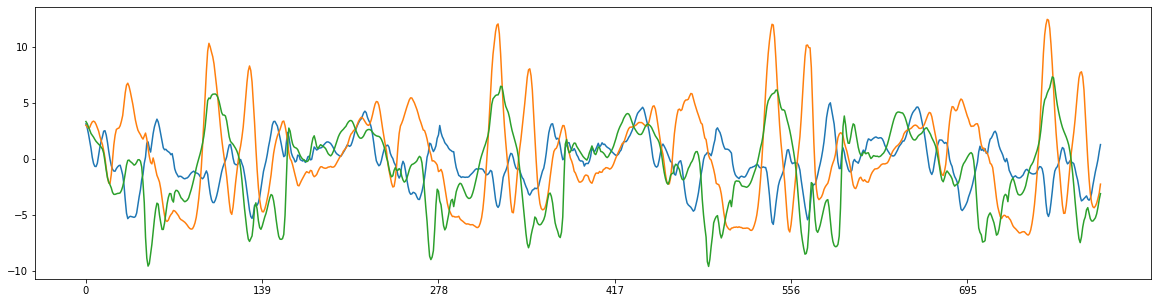

60 %


In [20]:
cnt = 0
for j in range(0, 10):
    rawData = pd.read_csv(f'JangSungwon/normalWalk{j}.csv')
    print_graph(rawData[['AccX', 'AccY', 'AccZ']], 139)
    result = main(rawData, 139)
    if (result == True):
        cnt += 1
print(cnt*10, "%")

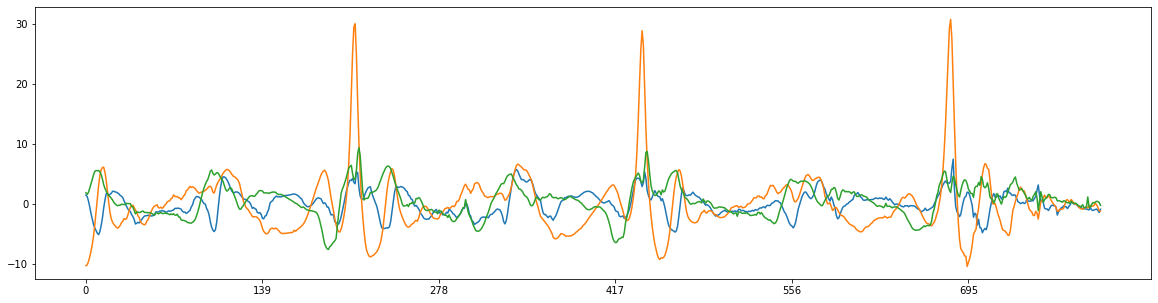

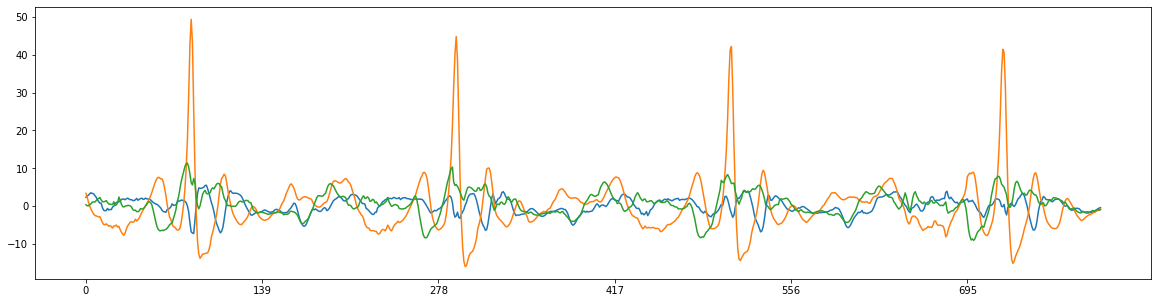

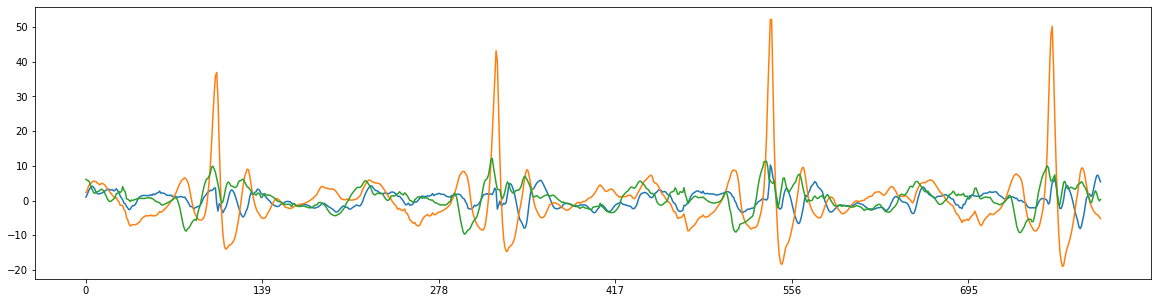

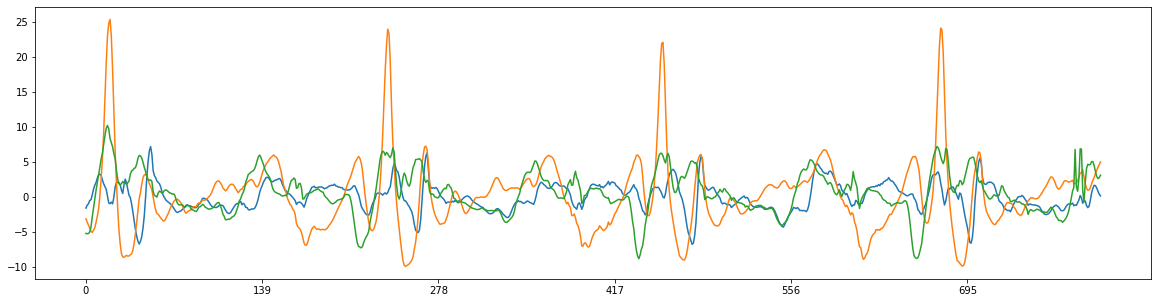

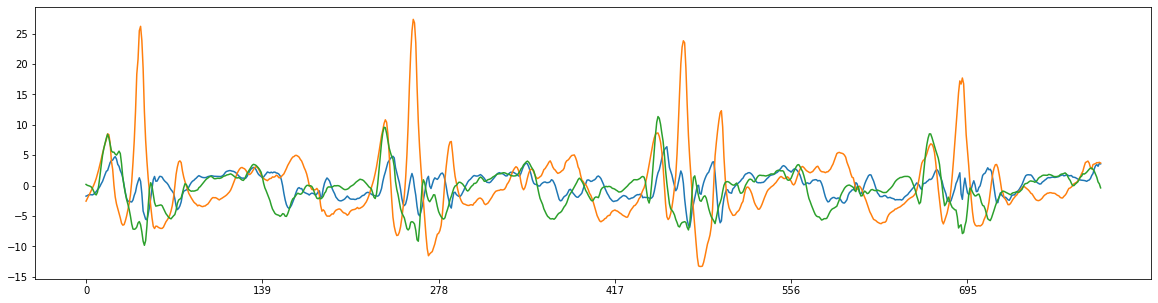

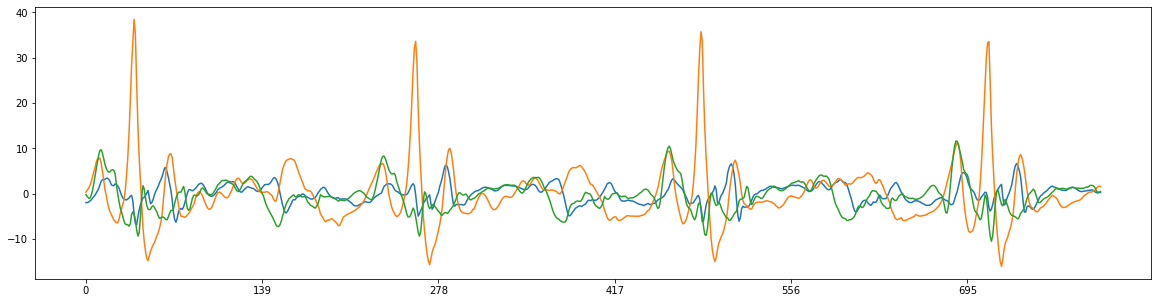

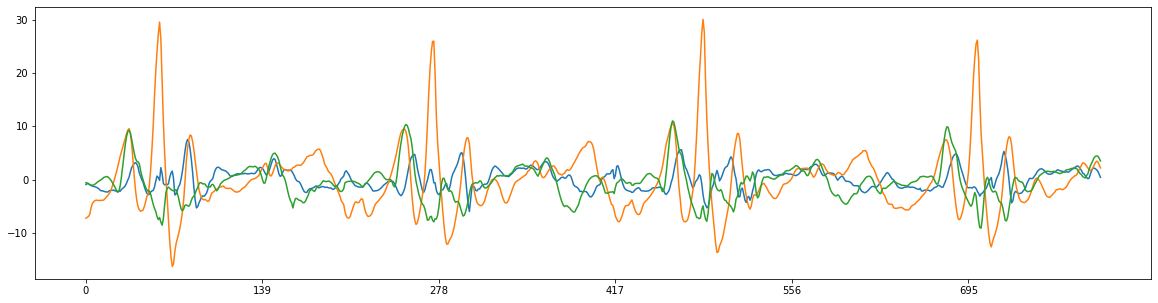

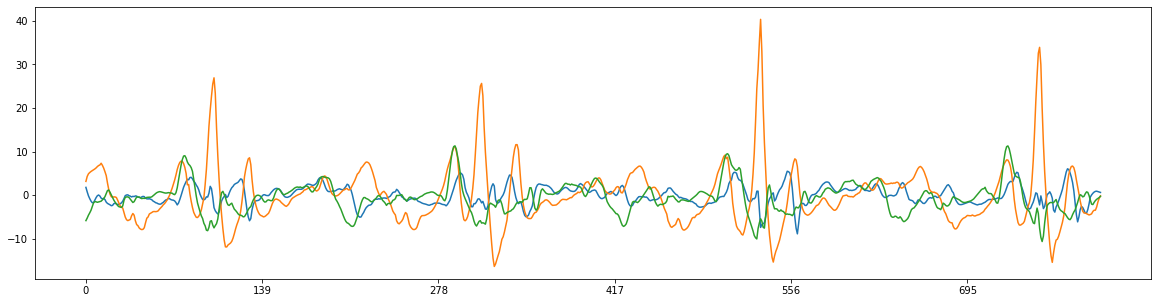

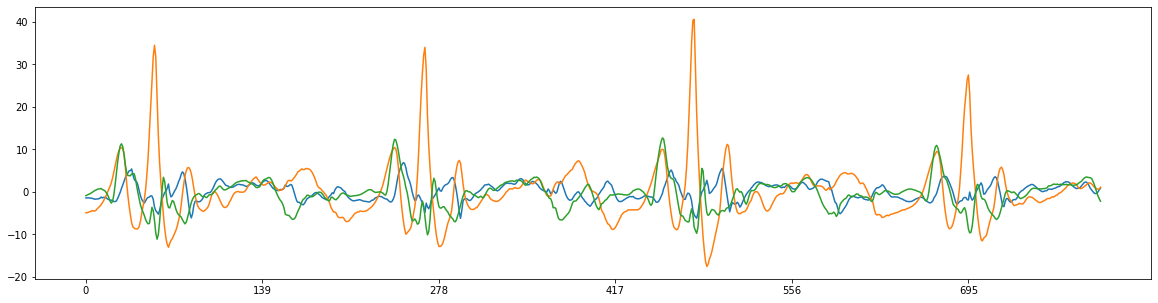

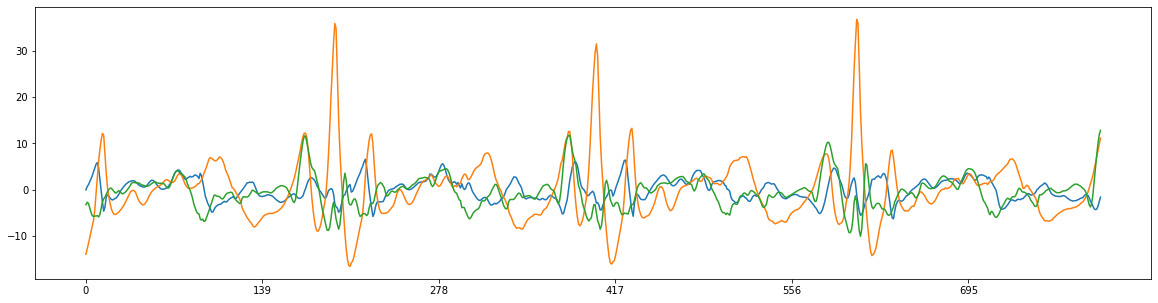

100 %


In [21]:
cnt = 0
for j in range(0, 10):
    rawData = pd.read_csv(f'LeeSohyun/normalWalk{j}.csv')
    print_graph(rawData[['AccX', 'AccY', 'AccZ']], 139)
    result = main(rawData, 139)
    if (result == True):
        cnt += 1
print(cnt*10, "%")

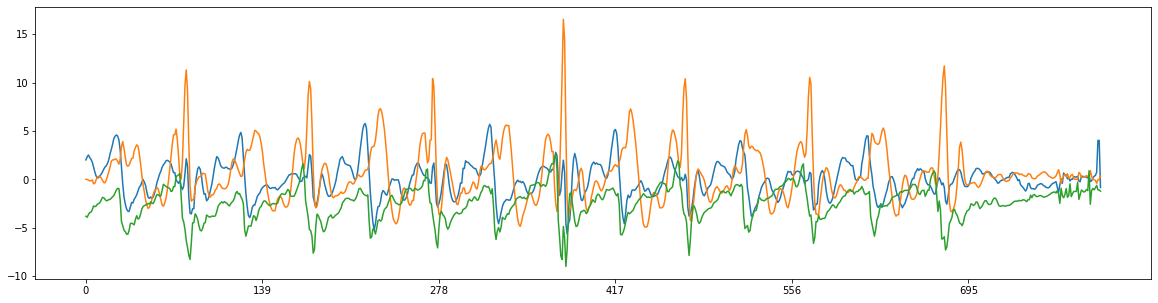

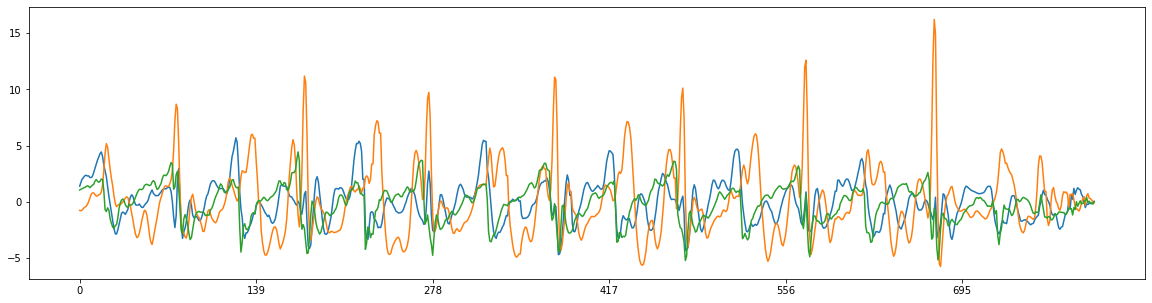

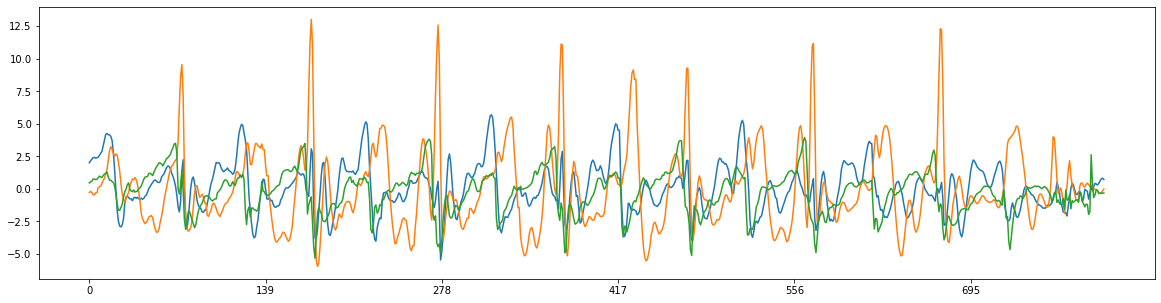

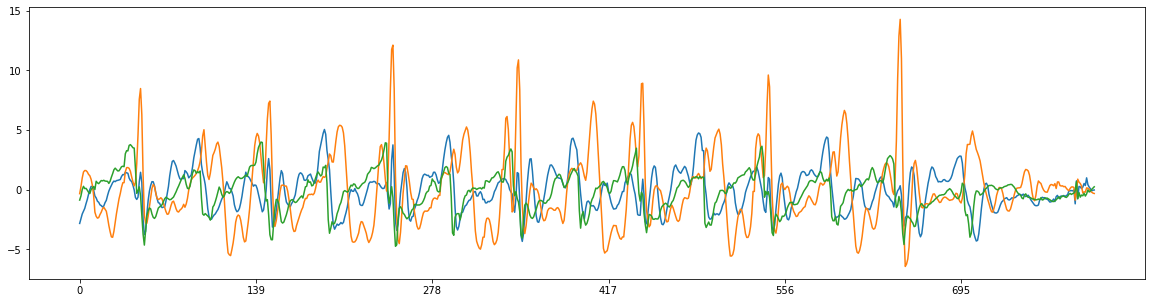

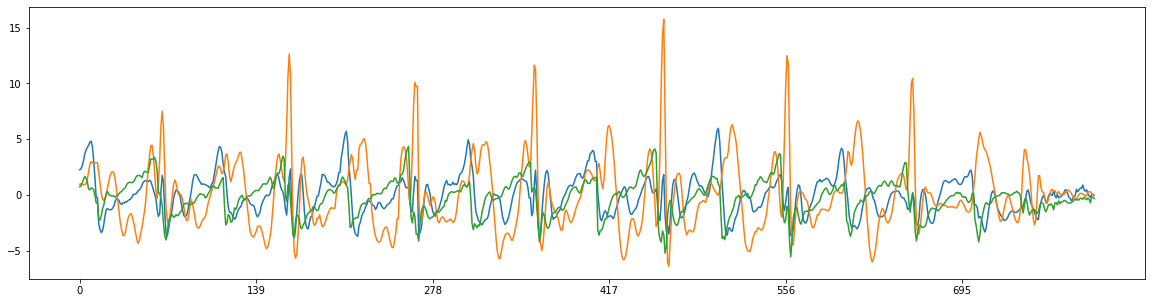

100 %


In [22]:
cnt = 0
for j in range(0, 5):
    rawData = pd.read_csv(f'BaekMihye/normalWalk{j}.csv')
    print_graph(rawData[['AccX', 'AccY', 'AccZ']], 139)
    result = main(rawData, 139)
    if (result == True):
        cnt += 1
print(cnt*20, "%")